In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1=pd.read_excel("churn.xlsx")
data=df_1[['tenure','TotalCharges','Churn']]
df=pd.DataFrame(data)
print(df.head())
df.isnull().sum()


   tenure TotalCharges Churn
0       1        29.85    No
1      34       1889.5    No
2       2       108.15   Yes
3      45      1840.75    No
4       2       151.65   Yes


tenure          0
TotalCharges    0
Churn           0
dtype: int64

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")



In [4]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["No", "Yes"]])

# Fit + transform only the "Churn" column
df["Churn"] = encoder.fit_transform(df[["Churn"]])

print(df)

      tenure  TotalCharges  Churn
0          1         29.85    0.0
1         34       1889.50    0.0
2          2        108.15    1.0
3         45       1840.75    0.0
4          2        151.65    1.0
...      ...           ...    ...
7038      24       1990.50    0.0
7039      72       7362.90    0.0
7040      11        346.45    0.0
7041       4        306.60    1.0
7042      66       6844.50    0.0

[7043 rows x 3 columns]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),
                                               df['Churn'],
                                               test_size=0.3,
                                               random_state=0)
X_train.shape,X_test.shape

((4930, 2), (2113, 2))

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [129]:
np.round(X_train_scaled.describe(),1)

,tenure,TotalCharges
count,4930.0,4922.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.3,-1.0
25%,-1.0,-0.8
50%,-0.1,-0.4
75%,0.9,0.7
max,1.6,2.8


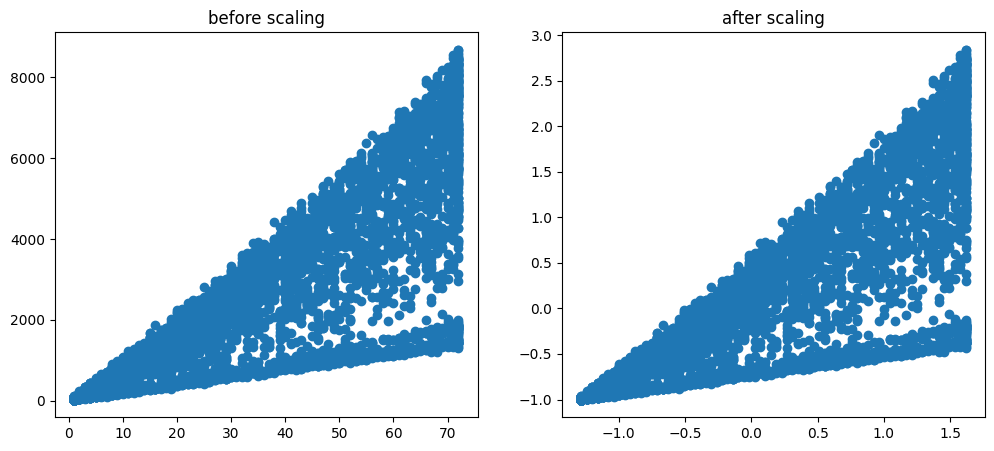

In [8]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['tenure'],X_train['TotalCharges'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['tenure'],X_train_scaled['TotalCharges'])
ax2.set_title("after scaling")
plt.show()


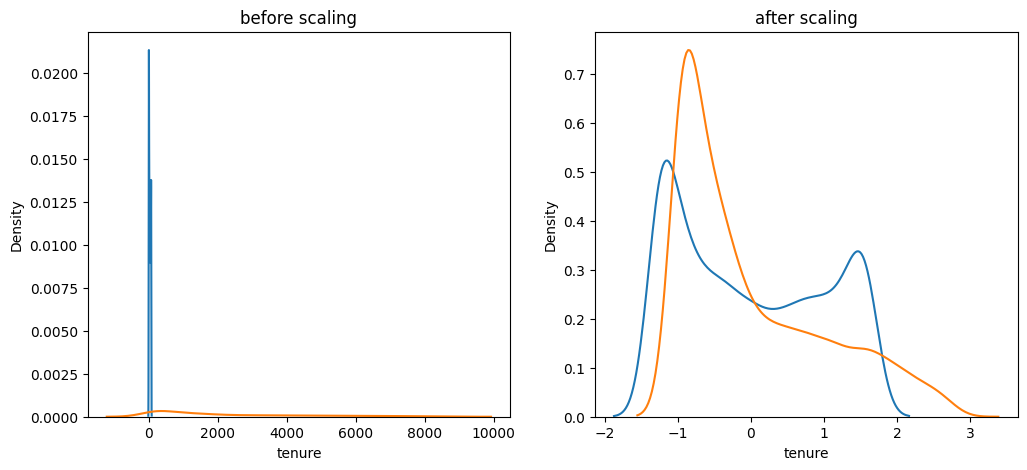

In [9]:
fig,(ax1,ax2) =plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['tenure'],ax=ax1,)
sns.kdeplot(X_train['TotalCharges'],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["tenure"],ax=ax2)
sns.kdeplot(X_train_scaled["TotalCharges"],ax=ax2)
plt.show()


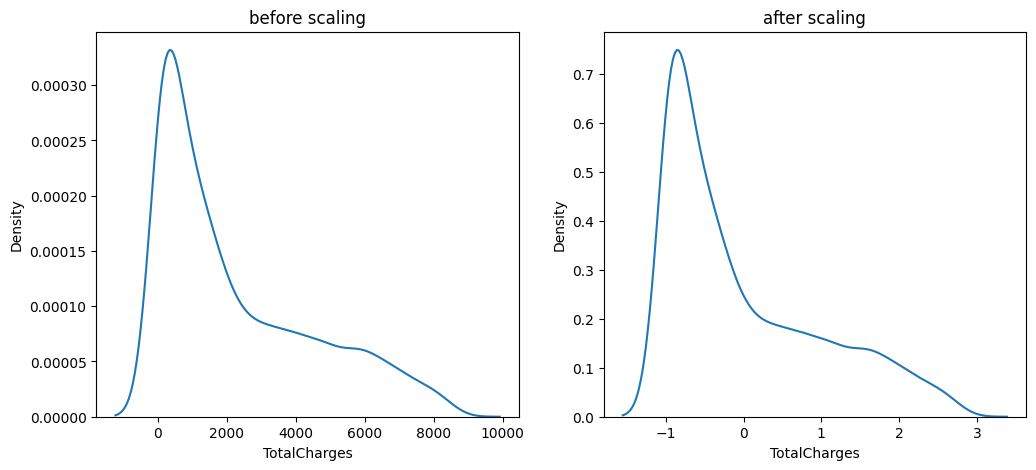

In [10]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train["TotalCharges"],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled["TotalCharges"],ax=ax2)
plt.show()

In [11]:
from  sklearn.ensemble import HistGradientBoostingClassifier

LR= HistGradientBoostingClassifier()
LRS= HistGradientBoostingClassifier()


In [12]:

LR.fit(X_train, y_train)
LRS.fit(X_train_scaled,y_train)



,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [13]:
y_pred=LR.predict(X_test)
y_pred_lrs=LRS.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score

print("actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_lrs))

actual 0.7808802650260294
Scaled 0.7808802650260294


[0. 0. 0. ... 0. 0. 0.]
